In [1]:
import pandas as pd

# Load the CSV file
df = pd.read_csv(r'C:\Users\nagai\OneDrive\Desktop\New folder\business_az_final (2).csv')
df.head()

,Unnamed: 0,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,126,anLQj9AM8vjbcLSIE0iUgg,Papa Murphy's,"7250 North La Cholla, Suite 186",Tucson,AZ,85741.0,32.338572,-111.010760,4.0,22,1,"{'OutdoorSeating': 'False', 'Alcohol': ""u'none...","Pizza, Restaurants",NaN
1,132,9C2rpb56aQvW0ViZHK9sPw,Home Plate Sports Pub,4880 E 22nd St,Tucson,AZ,85711.0,32.206315,-110.887843,3.5,56,1,"{'RestaurantsGoodForGroups': 'True', 'Alcohol'...","Bars, Restaurants, Sports Bars, Nightlife","{'Monday': '10:0-2:0', 'Tuesday': '10:0-2:0', ..."
2,234,Y6heWJJ9AmEL58fZwgi9YQ,Rosati's Pizza,2944 W Ina Rd,Tucson,AZ,85741.0,32.338724,-111.030310,4.0,58,1,"{'RestaurantsDelivery': 'True', 'RestaurantsTa...","Sports Bars, Bars, Nightlife, Italian, Restaur...","{'Monday': '0:0-0:0', 'Tuesday': '10:30-0:0', ..."
3,319,f82dhKNiUXsDVPMLqKYiIQ,Sher-e-Punjab,853 East Grant Rd,Tucson,AZ,85719.0,32.250960,-110.959158,4.0,446,1,"{'RestaurantsAttire': ""'casual'"", 'BusinessAcc...","Restaurants, Salad, Pakistani, Indian, Cocktai...","{'Tuesday': '16:0-21:0', 'Wednesday': '16:0-21..."
4,457,D7z_V6E8cxXghSRcHAmUPg,La Bella China Restaurant,5680 S 12th Ave,Tucson,AZ,85706.0,32.149473,-110.978186,4.0,92,1,"{'GoodForKids': 'True', 'BusinessAcceptsCredit...","Restaurants, Chinese","{'Tuesday': '11:0-19:30', 'Wednesday': '11:0-1..."


In [3]:
# Drop rows that have NaN in 'categories' to avoid errors
df = df.dropna(subset=['categories'])

# Split categories and aggregate into a list
all_categories = []
for cat_list_str in df['categories']:
    cat_list = cat_list_str.split(',')
    cat_list = [c.strip() for c in cat_list]  # strip extra spaces
    all_categories.extend(cat_list)

# Put all categories into a DataFrame for counting
cat_df = pd.DataFrame(all_categories, columns=['category'])

# Check a few rows
print(cat_df.head(10))


      category
0        Pizza
1  Restaurants
2         Bars
3  Restaurants
4  Sports Bars
5    Nightlife
6  Sports Bars
7         Bars
8    Nightlife
9      Italian


In [5]:
cat_counts = cat_df['category'].value_counts()
print(cat_counts.head(20))  # Show top 20 categories


category
Restaurants                  1639
Food                          542
Fast Food                     403
Mexican                       342
Sandwiches                    269
Nightlife                     255
Bars                          248
Burgers                       237
Breakfast & Brunch            234
American (Traditional)        228
Pizza                         183
American (New)                164
Coffee & Tea                  118
Chicken Wings                 104
Italian                        97
Event Planning & Services      95
Chinese                        90
Salad                          90
Desserts                       80
Cafes                          79
Name: count, dtype: int64


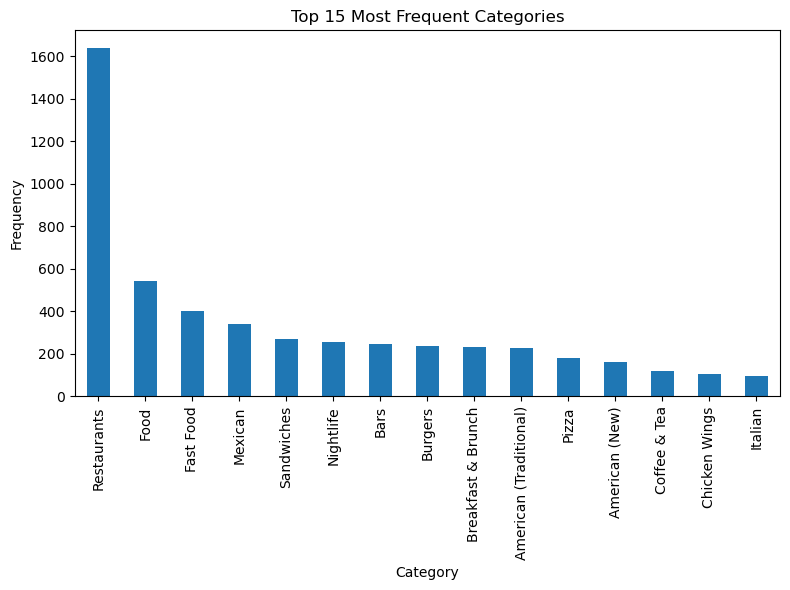

In [7]:
import matplotlib.pyplot as plt

top_n = 15  # how many categories to display
top_categories = cat_counts.head(top_n)

plt.figure(figsize=(8,6))
top_categories.plot(kind='bar')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.title(f'Top {top_n} Most Frequent Categories')
plt.tight_layout()
plt.show()


In [9]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


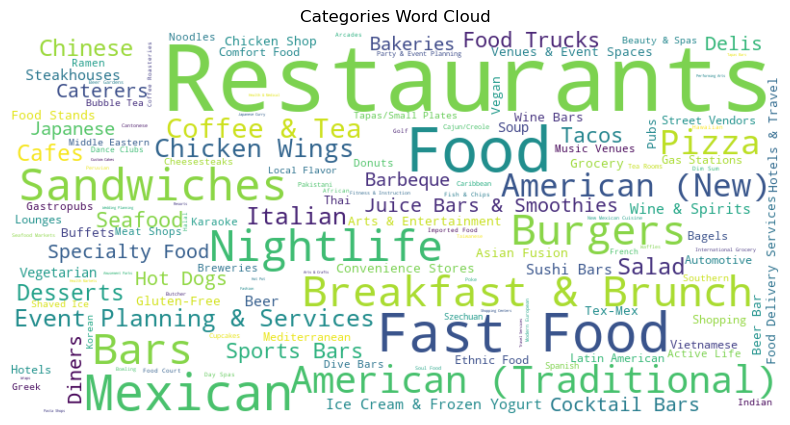

In [11]:
from wordcloud import WordCloud

# Generate a dictionary of {category: frequency} for the word cloud
cat_freq_dict = dict(cat_counts)

# Create and display the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white')
wordcloud.generate_from_frequencies(cat_freq_dict)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Categories Word Cloud")
plt.show()

In [13]:
pip install transformers

Note: you may need to restart the kernel to use updated packages.


In [ ]:
from transformers import logging

logging.set_verbosity_error()
from transformers import pipeline

# 1. Create a zero-shot pipeline
classifier = pipeline("zero-shot-classification", 
                      model="facebook/bart-large-mnli")

# 2. Define the broad meta-categories (customize as you wish)
candidate_labels = [
    "Food & Dining", 
    "Nightlife", 
    "Bars",
    "Health & Medical",
    "Beauty & Spas",
    "Shopping",
    "Services",
    "Travel",
    "Entertainment"
]

# 3. Sample some categories from your top counts
sample_cats = cat_counts.head(10).index.tolist()

# 4. Run zero-shot classification on each
print("Zero-Shot Classification Results\n---------------------------------")
for cat in sample_cats:
    result = classifier(cat, candidate_labels)
    top_label = result["labels"][0]
    top_score = result["scores"][0]
    print(f"Category: {cat}\n  Predicted label: {top_label} (score={top_score:.4f})\n")

Zero-Shot Classification Results
---------------------------------
Category: Restaurants
  Predicted label: Food & Dining (score=0.8900)

Category: Food
  Predicted label: Food & Dining (score=0.7036)

